<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/Statistical_Time_Series_Analysis/14-Auto_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto ARIMA

Auto-ARIMA stands for Automated ARIMA, and it's precisely what it sounds like — an automated version of the ARIMA modeling process. The main advantages of using Auto-ARIMA include:

## Why Auto ARIMA

1. Automation: It automatically determines the optimal parameters for the ARIMA model, saving time and reducing manual trial and error.

2. Accuracy: By evaluating various combinations of parameters, Auto-ARIMA can identify the most suitable model that minimizes forecast error.

## Important Parameters

While Auto-ARIMA simplifies model selection, it’s helpful to understand some of its key parameters:

- p, d, q: The order of the AR (autoregressive), I (integrated), and MA (moving average) parts of the model, respectively. Auto-ARIMA will search across different values to find the best combination.

- seasonal (bool): A boolean flag indicating if the series has a seasonal component, which will prompt Auto-ARIMA to also consider SARIMA (Seasonal ARIMA) models.

- stationary (bool): Whether the time-series is stationary and d should be set to zero.

- m: The number of periods in each season, relevant if the seasonal parameter is set to True.

- information_criterion: The metric used to select the best model, often AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

## Implementation

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -214.695
Date:                Mon, 15 Apr 2024   AIC                            437.390
Time:                        22:00:58   BIC                            449.242
Sample:                             0   HQIC                           442.206
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7812      0.101     -7.768      0.000      -0.978      -0.584
ar.L2         -0.4938      0.120     -4.117      0.000      -0.729      -0.259
ar.L3         -0.1883      0.094     -1.999      0.0

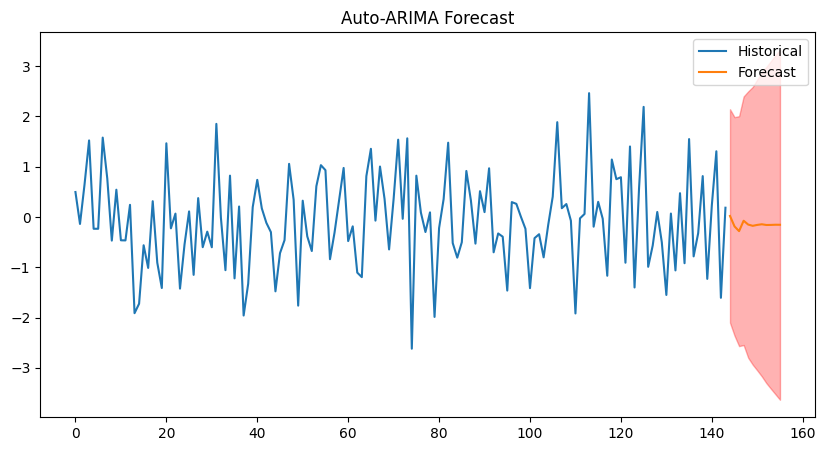

In [5]:
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt

# Sample data: monthly airline passengers
# This is a placeholder for actual data.
np.random.seed(42)
data = np.random.randn(144, 1)

# Fit an Auto-ARIMA model
auto_arima_model = pm.auto_arima(data,
                                 seasonal=True,  # considering seasonality
                                 m=12,           # monthly data
                                 d=1,            # differencing
                                 start_p=1,      # initial guess for AR order
                                 start_q=1,      # initial guess for MA order
                                 max_p=3,        # max AR order
                                 max_q=3)        # max MA order

# Summary of the model
print(auto_arima_model.summary())

# Forecasting the next 12 steps
forecast, conf_int = auto_arima_model.predict(n_periods=12, return_conf_int=True)

# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(data, label='Historical')
plt.plot(np.arange(len(data), len(data) + 12), forecast, label='Forecast')
plt.fill_between(np.arange(len(data), len(data) + 12), 
                 conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
plt.title('Auto-ARIMA Forecast')
plt.legend()
plt.show()

The Auto ARIMA results provide a detailed summary of the fitted seasonal autoregressive integrated moving average (SARIMAX) model. Let's break down the main components:

1. **Number of Observations**: There are 144 observations used in fitting the model.

2. **Model Type**: The SARIMAX(3, 1, 0) indicates that the model is a Seasonal ARIMA model with 3 autoregressive terms, 1 level of differencing (indicating that the data needed differencing to be made stationary), and 0 moving average terms.

3. **Log Likelihood**: This is a measure of the goodness of fit of the model. A higher log-likelihood indicates a model that better explains the observed data. In this case, the value is -214.695.

4. **AIC/BIC/HQIC**: These are information criteria used to compare models - the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Lower values are preferred, suggesting a model with a better fit per the number of parameters used. The values are 437.390, 449.242, and 442.206 respectively.

5. **Coefficient Estimates**:
   - **ar.L1 to ar.L3**: These are the coefficients for the autoregressive terms. They are all significant (p < 0.05), with the first lag having the largest negative effect and each subsequent lag having a progressively smaller (yet still significant) negative impact on the dependent variable 'y'.
   - **sigma2**: This is the estimated variance of the error terms. A higher value indicates more variation being captured by the model.

6. **Diagnostic Statistics**:
   - **Ljung-Box Test**: Tests for autocorrelation in the residuals at lag 1. A p-value greater than 0.05 (0.62 in this case) indicates no significant autocorrelation.
   - **Jarque-Bera Test**: Tests for normality of the residuals. A high p-value (0.05 here) suggests that residuals are normally distributed.
   - **Heteroskedasticity Test**: Tests whether the variance of the residuals is constant over time. A p-value below 0.05 indicates the presence of heteroskedasticity. Here, the value is exactly 1.31, means no heteroskedasticity.
   - **Skew and Kurtosis**: Measures of the asymmetry and tailedness of the residual distribution. The skew is close to 0, indicating symmetry, while the kurtosis is close to 3 (the kurtosis of a normal distribution), indicating a lack of heavy tails.

The model chosen by Auto ARIMA is a SARIMAX(3, 1, 0) model. It indicates that the process requires differencing once to achieve stationarity and that the best fit was achieved with a third-order autoregressive component and no moving average component.

The evaluation metrics suggest the model fits the data well, with significant AR terms and no alarming signs from the diagnostics. 